# ***Exploratory Data Analytisis (EDA) and Machine Learning***





In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Importing dataset
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

ID Individu: Pengenal untuk setiap individu.

Jenis Kelamin: Jenis kelamin individu (Laki-laki/Perempuan).

Usia: Usia individu dalam tahun.

Pekerjaan: Pekerjaan atau profesi individu.

Durasi Tidur (jam): Jumlah jam tidur individu per hari.

Kualitas Tidur (skala: 1-10): Penilaian subjektif tentang kualitas tidur, skala dari 1 hingga 10.

Tingkat Aktivitas Fisik (menit/hari): Jumlah menit individu terlibat dalam aktivitas fisik setiap hari.

Tingkat Stres (skala: 1-10): Penilaian subjektif tentang tingkat stres yang dialami individu, skala dari 1 hingga 10.

Kategori BMI: Kategori BMI individu (misalnya, Kurus, Normal, Berat Badan Berlebih).

Tekanan Darah (sistolik/diastolik): Pengukuran tekanan darah individu, diindikasikan sebagai tekanan sistolik atas tekanan diastolik.

Detak Jantung (bpm): Detak jantung istirahat individu dalam denyut per menit.

Langkah Harian: Jumlah langkah yang diambil individu setiap hari.

Gangguan Tidur: Kehadiran atau ketiadaan gangguan tidur pada individu (Tidak Ada, Insomnia, Sleep Apnea).

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


import numpy as np
from google.colab import autoviz
df_3880600997943331879 = autoviz.get_df('df_3880600997943331879')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3880600997943331879, *['Person ID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1729113553615486199 = autoviz.get_df('df_1729113553615486199')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1729113553615486199, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_246445928822231490 = autoviz.get_df('df_246445928822231490')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_246445928822231490, *['Sleep Duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6907163540386910443 = autoviz.get_df('df_6907163540386910443')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6907163540386910443, *['Quality of Sleep'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5790941817844045408 = autoviz.get_df('df_5790941817844045408')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5790941817844045408, *['Person ID'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3516814073931332974 = autoviz.get_df('df_3516814073931332974')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3516814073931332974, *['Age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6882813258481891288 = autoviz.get_df('df_6882813258481891288')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6882813258481891288, *['Sleep Duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2507599795509927805 = autoviz.get_df('df_2507599795509927805')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2507599795509927805, *['Quality of Sleep'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315768722147845562 = autoviz.get_df('df_3315768722147845562')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3315768722147845562, *['Gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1503600955633945933 = autoviz.get_df('df_1503600955633945933')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1503600955633945933, *['BMI Category'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7293502983024882500 = autoviz.get_df('df_7293502983024882500')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7293502983024882500, *['Sleep Disorder'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7897791612645303041 = autoviz.get_df('df_7897791612645303041')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_7897791612645303041, *[[['Person ID', 'Age'], ['Age', 'Sleep Duration'], ['Sleep Duration', 'Quality of Sleep'], ['Quality of Sleep', 'Physical Activity Level']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3943986030289567518 = autoviz.get_df('df_3943986030289567518')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_3943986030289567518, *['Gender', 'BMI Category'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6371223778258818564 = autoviz.get_df('df_6371223778258818564')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_6371223778258818564, *['BMI Category', 'Sleep Disorder'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4128911776515141356 = autoviz.get_df('df_4128911776515141356')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4128911776515141356, *['Person ID', 'Gender'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5346079657541299587 = autoviz.get_df('df_5346079657541299587')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5346079657541299587, *['Person ID', 'BMI Category'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8094465302994844367 = autoviz.get_df('df_8094465302994844367')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8094465302994844367, *['Person ID', 'Sleep Disorder'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_6139307632967251113 = autoviz.get_df('df_6139307632967251113')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6139307632967251113, *['Age', 'Gender'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7929187413556089381 = autoviz.get_df('df_7929187413556089381')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7929187413556089381, *['Person ID', 'Sleep Duration', 'Gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_551389772038038635 = autoviz.get_df('df_551389772038038635')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_551389772038038635, *['Person ID', 'Sleep Duration', 'BMI Category'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4579450095810352545 = autoviz.get_df('df_4579450095810352545')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4579450095810352545, *['Person ID', 'Sleep Duration', 'Sleep Disorder'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3742552145953904724 = autoviz.get_df('df_3742552145953904724')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3742552145953904724, *['Person ID', 'Quality of Sleep', 'Gender'], **{})
chart

In [ ]:
# Banyaknya kolom dan baris
df.shape

(374, 13)

In [ ]:
# Mendeteksi nilai yang hilang
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [ ]:
# Banyaknya variasi
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

# 1. Exploratory Data Analysis (EDA)

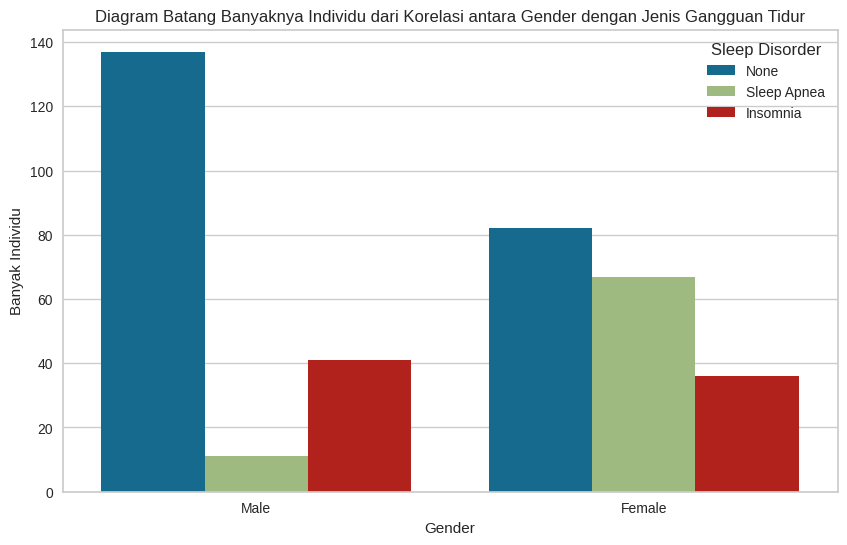

In [ ]:
# Diagram batang banyaknya individu untuk membandingkan jenis gangguan tidur yang berbeda pada tiap jenis kelamin.
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender',hue='Sleep Disorder')
plt.title('Diagram Batang Banyaknya Individu dari Korelasi antara Gender dengan Jenis Gangguan Tidur')
plt.ylabel('Banyak Individu')
plt.xlabel('Gender')
plt.show()

<ipython-input-14-2632dfddc7cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

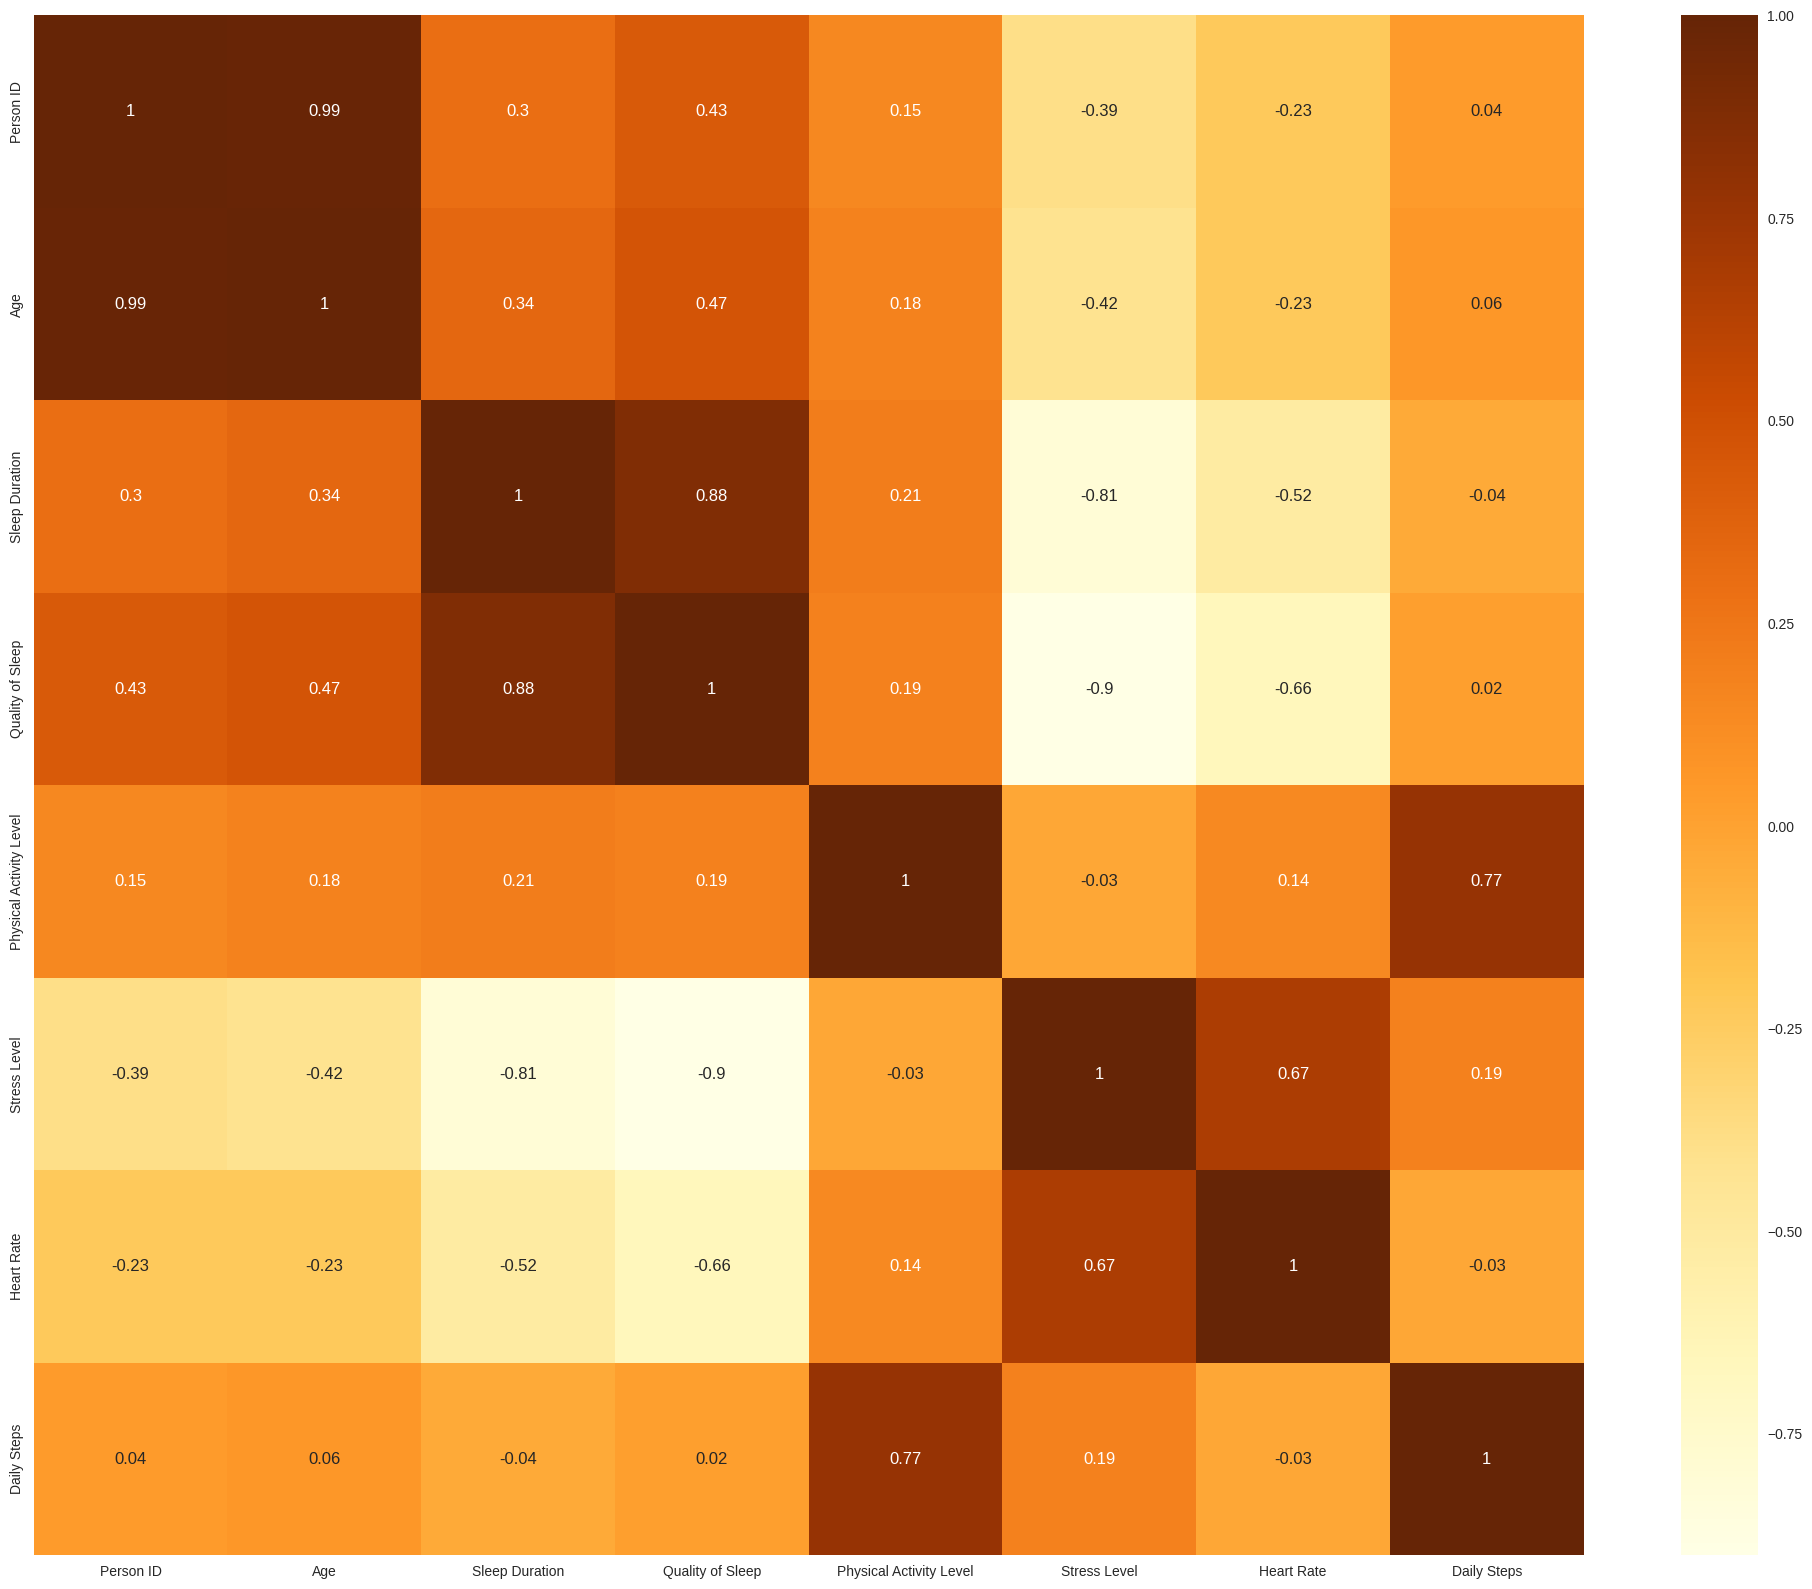

In [ ]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

# Rumusan Masalah:
1. Bagaimana hubungan antara durasi tidur dengan kualitas tidur?
2. Bagaimana hubungan Aktivitas Fisik dengan Kualitas Tidur?
3. Bagaimana Hubungan tingkat stres dengan kualitas tidur?
4. Bagaimana hubungan Perbedaan Jenis Kelamin dalam Durasi Tidur?
5. Bagaimana hubungan Pekerjaan dan Durasi Tidur?

Hubungan atau akurasi antara durasi tidur dengan kualitas tidur: 0.8832130004106171


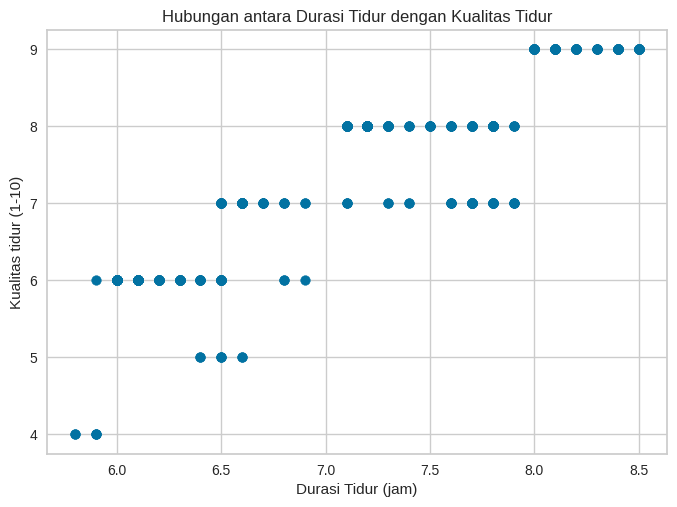

In [ ]:
# 1.) Hubungan antara Durasi Tidur dengan Kualitas Tidur

korelasi = df['Sleep Duration'].corr(df['Quality of Sleep'])
print('Hubungan atau akurasi antara durasi tidur dengan kualitas tidur:',korelasi)

plt.scatter(df['Sleep Duration'],df['Quality of Sleep'])
plt.xlabel('Durasi Tidur (jam)')
plt.ylabel('Kualitas tidur (1-10)')
plt.title('Hubungan antara Durasi Tidur dengan Kualitas Tidur')
plt.show()



Semakin lama durasi tidur seseorang, maka kualitas tidurnya akan semakin baik

In [ ]:
# 2.) Hubungan antara Aktivitas Fisik dengan Kualitas Tidur




# EDA ON GOING

# Model Building

Untuk memprediksi gejala gangguan tidur, akan digunakan teknik berupa Logistic Regression, Decision Tree, Random Forest, dan SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, RFE

In [ ]:
df = df.drop('Person ID', axis = 1)


In [ ]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
# OneHot label encoder

hot = pd.get_dummies(df[['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']])
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], axis = 1)


Tujuan **OneHot Label Encoder** adalah mengkonfersi data-data kategorikal dan string yang bersifat kategorikal menjadi numeric yang dapat dengan mudah dipahami model. Mengubah categorical data menjadi sebuah vektor biner dengan nilai 1 pada kategori yang sesuai dan 0 untuk kategori lainnya

In [ ]:
df

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Female,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,27,6.1,6,42,6,77,4200,None,0,1,...,0,0,0,0,0,0,0,0,0,0
1,28,6.2,6,60,8,75,10000,None,0,1,...,0,0,0,0,0,0,0,0,0,0
2,28,6.2,6,60,8,75,10000,None,0,1,...,0,0,0,0,0,0,0,0,0,0
3,28,5.9,4,30,8,85,3000,Sleep Apnea,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,5.9,4,30,8,85,3000,Sleep Apnea,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,68,7000,Sleep Apnea,1,0,...,0,0,0,0,0,0,0,0,1,0
370,59,8.0,9,75,3,68,7000,Sleep Apnea,1,0,...,0,0,0,0,0,0,0,0,1,0
371,59,8.1,9,75,3,68,7000,Sleep Apnea,1,0,...,0,0,0,0,0,0,0,0,1,0
372,59,8.1,9,75,3,68,7000,Sleep Apnea,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Memisahkan fitur dan target

X = df.drop(['Sleep Disorder'], axis=1)
X = X.values
y = df['Sleep Disorder']



In [ ]:
X

array([[27. ,  6.1,  6. , ...,  0. ,  0. ,  0. ],
       [28. ,  6.2,  6. , ...,  0. ,  0. ,  0. ],
       [28. ,  6.2,  6. , ...,  0. ,  0. ,  0. ],
       ...,
       [59. ,  8.1,  9. , ...,  0. ,  1. ,  0. ],
       [59. ,  8.1,  9. , ...,  0. ,  1. ,  0. ],
       [59. ,  8.1,  9. , ...,  0. ,  1. ,  0. ]])

In [ ]:
# Membagi dataset ke training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
# Feauture scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


0.9066666666666666

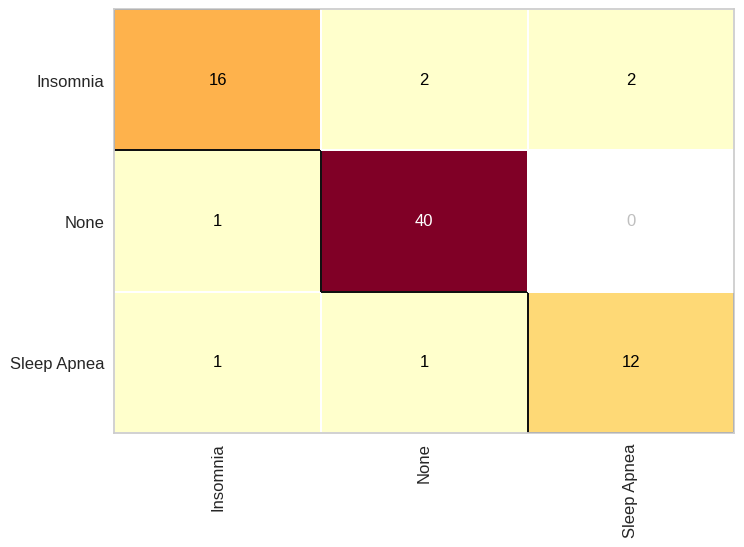

In [ ]:
# Model Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=10000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

              precision    recall  f1-score   support

    Insomnia       0.89      0.80      0.84        20
        None       0.93      0.98      0.95        41
 Sleep Apnea       0.86      0.86      0.86        14

    accuracy                           0.91        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.91      0.91      0.91        75



0.9066666666666666

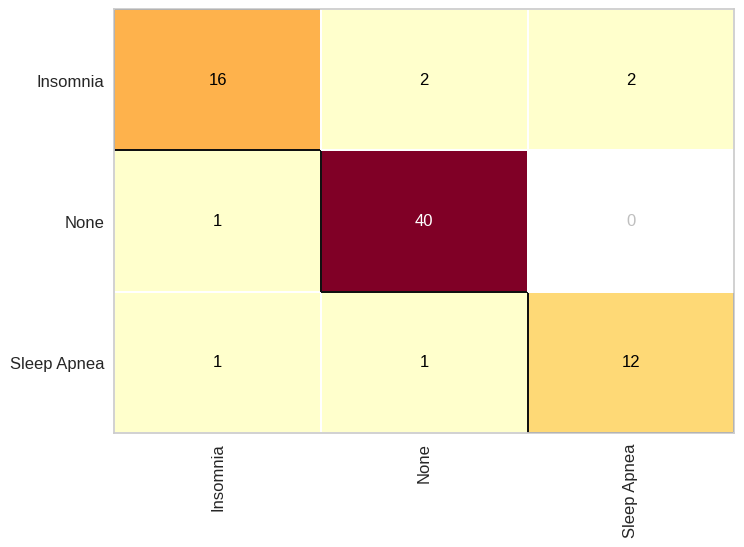

In [ ]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
# Fitur seleksi menggunakan Recursive Feature Elimination (RFE)
estimator = DecisionTreeClassifier()
rfe_selector = RFE(estimator, n_features_to_select= 5 )
X_train_selected_rfe = rfe_selector.fit_transform(X_train, y_train)
X_test_selected_rfe = rfe_selector.transform(X_test)

# Pohon Keputusan Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_selected_rfe, y_train)
dt_accuracy = dt_model.score(X_test_selected_rfe, y_test)

# Model Hutan Acak
rf_model = RandomForestClassifier()
rf_model.fit(X_train_selected_rfe, y_train)
rf_accuracy = rf_model.score(X_test_selected_rfe, y_test)

# Model Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train_selected_rfe , y_train)
svm_accuracy = svm_model.score(X_test_selected_rfe, y_test)

# Menampilkan akurasi model
print ( "Logistic Regression Accuracy:" , lr_accuracy)
print ( "Decision Tree Accuracy:" , dt_accuracy)
print ( "Random Forest Accuracy:" , rf_accuracy)
print ( " Akurasi SVM:" , svm_accuracy)

Logistic Regression Accuracy: 0.8266666666666667
Decision Tree Accuracy: 0.9066666666666666
Random Forest Accuracy: 0.9066666666666666
 Akurasi SVM: 0.8533333333333334


0.9066666666666666

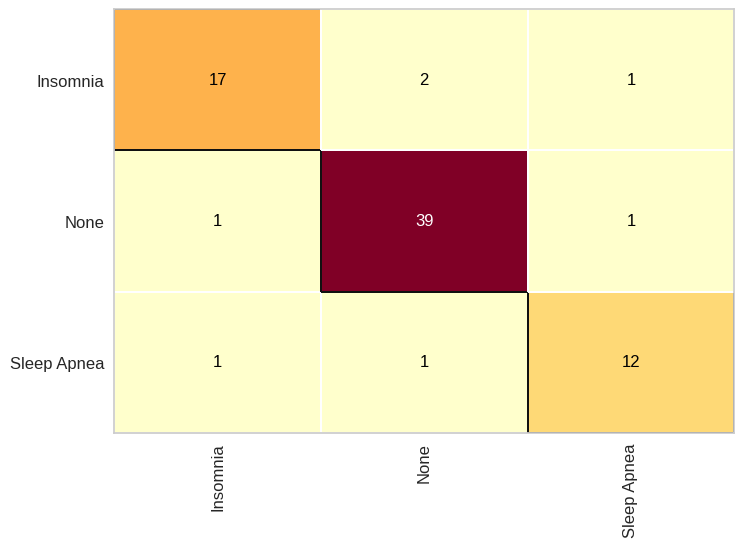

In [ ]:


cm = ConfusionMatrix(dt_model)
cm.fit(X_train_selected_rfe, y_train)
cm.score(X_test_selected_rfe, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }


model = GradientBoostingClassifier()
gridGradient = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)


print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.01
Score:  0.9031073446327683


0.9066666666666666

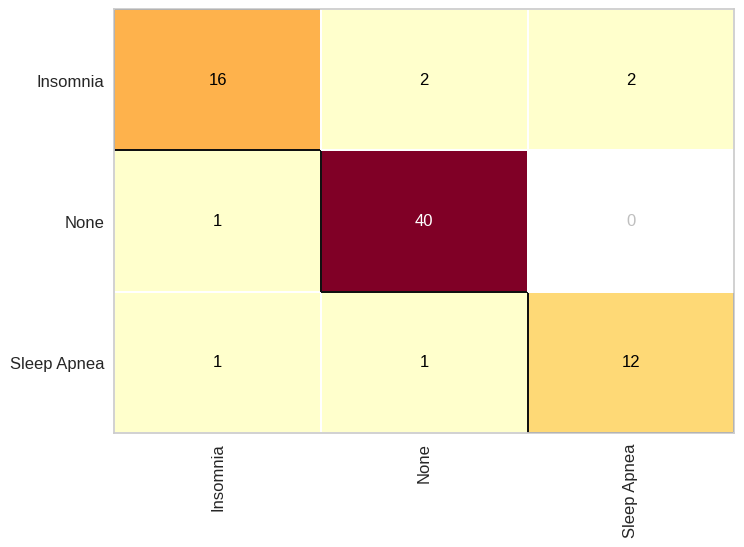

In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.01, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)

cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)